In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
input_file = pd.read_csv('cardata.txt', sep = ',', header = None)
# input_file = pd.read_csv('cardata.txt', delimiter = ',', header = None) 
display(input_file.head())

# Reading the data
X = input_file.iloc[:, 0:-1].values
y = input_file.iloc[:, -1].values
print(X.shape, y.shape)

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


(1728, 6) (1728,)


資料說明
1. buying：買價 (vhigh、high、med、low)
2. maint：維修保養價格 (vhigh、high、med、low)
3. doors：門數 (2、3、4、5、5more)
4. persons：載人量 (2、4、more)
5. lug_boot：行李箱大小 (small、med、big)
6. safety：安全 (low、med、high)
7. car：汽車可接受度 (unacc、acc、good、vgood)

In [3]:
input_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1728 non-null   object
 1   1       1728 non-null   object
 2   2       1728 non-null   object
 3   3       1728 non-null   object
 4   4       1728 non-null   object
 5   5       1728 non-null   object
 6   6       1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [4]:
# Convert string data to numerical data將字串資料轉換為數值資料
# TODO

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
car_encoder_X = OrdinalEncoder()
car_encoder_y = LabelEncoder()

X_num = car_encoder_X.fit_transform(X)
y_num = car_encoder_y.fit_transform(y)

print(X_num.shape, y_num.shape)

# car_encoder_y.fit(["unacc", "acc", "good", "vgood"])

(1728, 6) (1728,)


In [5]:
print(car_encoder_X.categories_)
print(car_encoder_y.classes_)

[array(['high', 'low', 'med', 'vhigh'], dtype=object), array(['high', 'low', 'med', 'vhigh'], dtype=object), array(['2', '3', '4', '5more'], dtype=object), array(['2', '4', 'more'], dtype=object), array(['big', 'med', 'small'], dtype=object), array(['high', 'low', 'med'], dtype=object)]
['acc' 'good' 'unacc' 'vgood']


In [6]:
# Build a Random Forest classifier建立隨機森林分類器
# three-dold cross-validation
# n_estimators=200, max_depth=8, random_state=7
# TODO

classifier = RandomForestClassifier(n_estimators=200, max_depth=8, random_state=7)
classifier.fit(X_num, y_num)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

In [7]:
# Cross validation交叉驗證
from sklearn import model_selection
# TODO

accuracies = model_selection.cross_val_score(estimator = classifier, X = X_num, y = y_num, cv = 3)

In [15]:
print("Accuracy of the classifier=" + str(round(accuracies.mean(), 4)) + "%")

Accuracy of the classifier=0.7766%


In [9]:
# Testing encoding on single data instance測試單個資料實例上的編碼
input_data = [['high', 'low', '2', 'more', 'med', 'high']]
# TODO

input_data_num = car_encoder_X.transform(input_data)
target_num = classifier.predict(input_data_num)
target = car_encoder_y.inverse_transform(target_num)

In [10]:
# Predict and print output for a particular datapoint
# TODO
print("Output class=" + target)


['Output class=acc']


In [11]:
########################
# Validation curves 驗證曲線

# TODO
from sklearn.model_selection import validation_curve

In [12]:
# 最佳化超參數n_estimators，設定max_depth=8, random_state=7, parameter_grid=np.linspace(25, 200, 8).astype(int), cv=5
train_scores, validation_scores = validation_curve(classifier, X_num, y_num, 
        "n_estimators", param_range=np.linspace(25, 200, 8).astype(int), cv=5)
print("##### VALIDATION CURVES #####")
print("\nParam: n_estimators\nTraining scores:\n", train_scores)
print("\nParam: n_estimators\nValidation scores:\n", validation_scores)

##### VALIDATION CURVES #####

Param: n_estimators
Training scores:
 [[0.97467438 0.97105644 0.97105644 0.97686189 0.96529284]
 [0.97322721 0.97322721 0.97539797 0.98698482 0.96963124]
 [0.97684515 0.97467438 0.97322721 0.98770788 0.98047722]
 [0.97612156 0.97684515 0.97467438 0.98770788 0.97903109]
 [0.97467438 0.97684515 0.97539797 0.98698482 0.98047722]
 [0.97539797 0.97539797 0.97756874 0.98553868 0.97903109]
 [0.97322721 0.97612156 0.97756874 0.98553868 0.97758496]
 [0.97322721 0.97612156 0.97539797 0.98626175 0.97541576]]

Param: n_estimators
Validation scores:
 [[0.66184971 0.78612717 0.79768786 0.8057971  0.88115942]
 [0.67919075 0.80057803 0.78612717 0.7884058  0.89855072]
 [0.65317919 0.79190751 0.78612717 0.78550725 0.90434783]
 [0.63294798 0.79479769 0.76589595 0.7826087  0.91304348]
 [0.66473988 0.77745665 0.79190751 0.79130435 0.90144928]
 [0.70520231 0.77745665 0.79479769 0.79130435 0.90434783]
 [0.65028902 0.7716763  0.79479769 0.7884058  0.90434783]
 [0.66763006 0.7716

In [13]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(validation_scores, axis=1)
test_scores_std = np.std(validation_scores, axis=1)
param_range = np.linspace(25, 200, 8).astype(int)

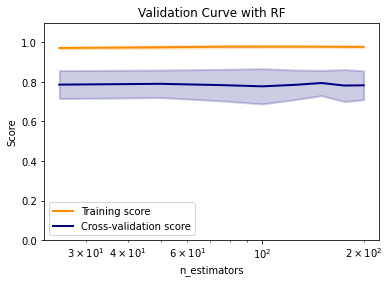

In [14]:
plt.title("Validation Curve with RF")
plt.xlabel("n_estimators")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

https://machine-learning-python.kspax.io/ex3_plotting_validation_curves